<a href="https://colab.research.google.com/github/rrahman1215/Assignment1/blob/main/Assignment1Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

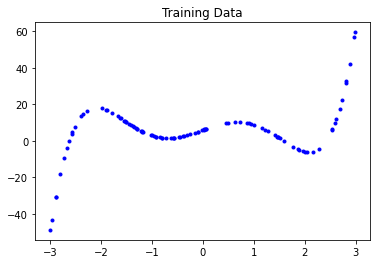

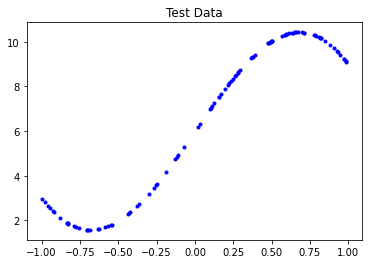

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Data visualization  
x_train = np.load('/content/Drive/MyDrive/x_train.npy')
y_train = np.load('/content/Drive/MyDrive/y_train.npy')
x_test = np.load('/content/Drive/MyDrive/x_test.npy')
y_test = np.load('/content/Drive/MyDrive/y_test.npy')

plt.plot(x_train,y_train,'b.')
plt.title("Training Data")
plt.show()
plt.plot(x_test,y_test,'b.')
plt.title("Test Data")
plt.show()

In [ ]:
#Feature Engineering 
poly_order = 6 #This number can be changed to get polynomial basis of different orders

#Feature engineering on training data 
x_phi_train = []
for i in range(len(x_train)):
  train_row = []
  for j in range(poly_order):
    train_temp = x_train[i][0]**j
    train_row.append(train_temp)
  x_phi_train.append(train_row)

#Feature engineering on test data 
x_phi_test = []
for i in range(len(x_test)):
  test_row = []
  for j in range(poly_order):
    test_temp = x_train[i][0]**j
    test_row.append(test_temp)
  x_phi_test.append(test_row)

#Normal Equation 
theta = np.matmul(np.linalg.inv(np.matmul(np.transpose(x_phi_train),x_phi_train)) , np.matmul(np.transpose(x_phi_train),y_train) )

Average test data prediction error =  [211.42515053]
Average training data prediction error =  7.461420903991277e-26


Text(0.5, 1.0, 'Training Data Prediction Plot')

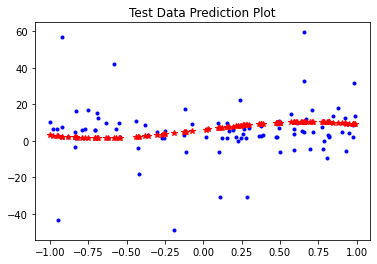

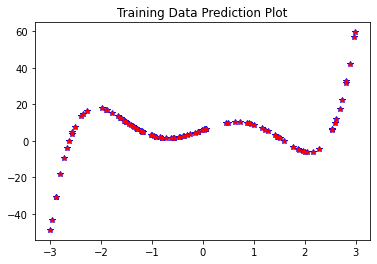

In [ ]:
#Prediction 
# Prediction on test data
y_predict = []
for i in range(len(x_phi_test)):
  y_predict_temp = np.matmul(np.transpose(theta),x_phi_test[i])
  y_predict.append(y_predict_temp)

MSE_test_data = 0
for i in range(len(y_predict)):
  MSE_test_data = MSE_test_data + (y_predict[i] - y_test[i])**2

MSE_test_data = MSE_test_data/100
print('Average test data prediction error = ',MSE_test_data)

plt.figure(1)
plt.plot(x_test,y_predict,'.b',label ='Prediction')
plt.plot(x_test,y_test,'*r', label = 'Test data')
plt.title('Test Data Prediction Plot')

# Prediction on training data
y_train_predict = []
for i in range(len(x_phi_test)):
  y_train_predict_temp = np.matmul(np.transpose(theta),x_phi_test[i])
  y_train_predict.append(y_train_predict_temp)  

MSE_train_data = 0
for i in range(len(x_train)):
  MSE_train_data = MSE_train_data + (y_train_predict[i] - y_train[i])**2

MSE_train_data = MSE_train_data/100
print('Average training data prediction error = ',MSE_train_data)


plt.figure(2)
plt.plot(x_train,y_train_predict,'*b',label ='Prediction on train data')
plt.plot(x_train,y_train,'.r', label = 'Training data')
plt.title('Training Data Prediction Plot')